In [54]:
import numpy as np
import matplotlib.pylab as plt
from scipy import signal as dsp
import plotter

# Single pole

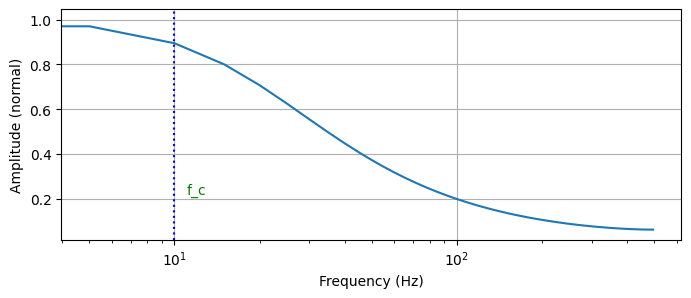

In [257]:
f_s = 1000;
f_c = 10;

f_c_normalized = 2*(f_c/f_s)

# decay value 
d = np.exp(-2*np.pi*f_c_normalized)

a = d
b = 1-d

num = [b, 0]
den = [1, -a]

filter = dsp.TransferFunction(num, den, dt = (1/f_s))

# get frequency response 
w_rad, mag_db, phase = filter.bode() 
w_hz = w_rad/ (2*np.pi)
mag = 10.0 ** (mag_db/20)

plotter.filter_plotter(w_hz, mag_db, f_c, amplitude_unit='normal', freq_unit='Hz')
# plt.plot(w_hz, mag)

# Butterworth filter 

### Lowpass

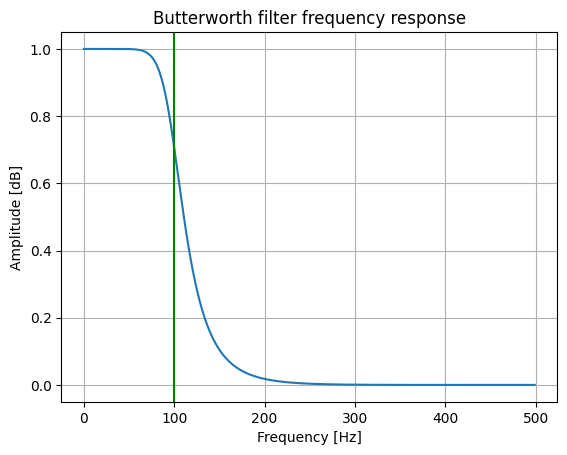

In [255]:
f_s = 1000; # sampling frequency in Hz
m = 5; # filter order 
f_c = 100  # cutoff frequency in Hz

# design filter 
[b,a] = dsp.butter(m, f_c, fs=f_s, btype='lowpass')

# get frequency response 
w, h = dsp.freqz(b, a)
w_hz = (f_s * w)/ (2*np.pi)

# plotting 
# plt.plot(w_hz, 20*np.log10(abs(h)))
plt.plot(w_hz, abs(h))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(f_c, color='green') # cutoff frequency
plt.show()

## Chebyshev Type 1

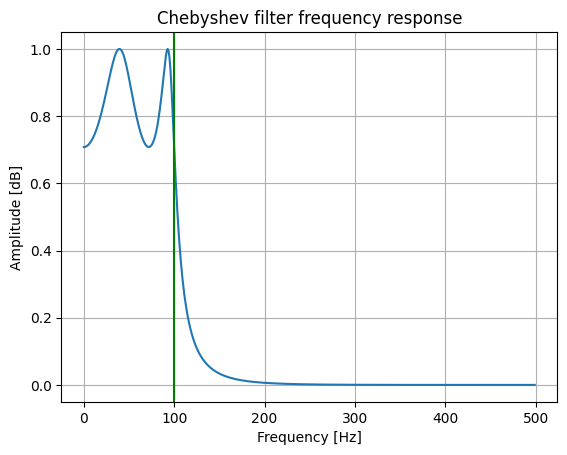

In [256]:
f_s = 1000; # sampling frequency in Hz

rp = 3 # max ripple
m = 4; # filter order 
f_c = 100  # cutoff frequency in Hz

# design filter 

b, a = dsp.cheby1(m, rp=rp, Wn=f_c, fs=f_s, btype='lowpass')

# get frequency response 
w, h = dsp.freqz(b, a)
w_hz = (f_s * w)/ (2*np.pi)

# plotting 
# plt.plot(w_hz, 20*np.log10(abs(h)))
plt.plot(w_hz, abs(h))
plt.title('Chebyshev filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(f_c, color='green') # cutoff frequency
plt.show()

## Elliptic

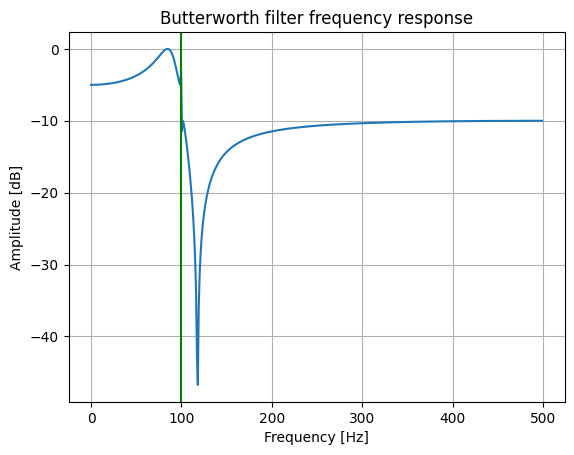

In [234]:
f_s = 1000; # sampling frequency in Hz

rp_pb = 5 # max ripple in passband
rp_sb = 10 # max ripple in stopband

m = 4; # filter order 
f_c = 100  # cutoff frequency in Hz

# design filter 

b, a = dsp.ellip(m, rp=rp_pb, rs=rp_sb, Wn=f_c, fs=f_s, btype='lowpass')

# get frequency response 
w, h = dsp.freqz(b, a)
w_hz = (f_s * w)/ (2*np.pi)

# plotting 
plt.plot(w_hz, 20*np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(f_c, color='green') # cutoff frequency
plt.show()